In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Read in the data
df = pd.read_csv('dataset_mood_smartphone-2.csv')

# convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# round time to nearest hour and group by time, person_id, and variable
df['time_hour'] = df['time'].dt.round('D')
grouped_df = df.groupby(['time_hour', 'id', 'variable']).mean().reset_index()

# use pivot_table to create columns for each variable
df_pivot = grouped_df.pivot_table(index=['time_hour', 'id'], columns='variable', values='value')

df_pivot

variable            activity  appCat.builtin  appCat.communication  \
time_hour  id                                                        
2014-02-17 AS14.02       NaN             NaN                   NaN   
           AS14.06       NaN             NaN                   NaN   
           AS14.09       NaN             NaN                   NaN   
           AS14.14       NaN             NaN                   NaN   
           AS14.16       NaN             NaN                   NaN   
...                      ...             ...                   ...   
2014-06-05 AS14.24  0.060415        8.974340             47.772636   
2014-06-06 AS14.24  0.165266       13.257393             32.346452   
2014-06-07 AS14.24  0.213989       45.813983             27.888311   
2014-06-08 AS14.24  0.040180       18.059342            123.205000   
2014-06-09 AS14.24  0.250000             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
time_hour  id                                                           
2014-02-17 AS14.02                   NaN             NaN          NaN   
           AS14.06                   NaN             NaN          NaN   
           AS14.09                   NaN             NaN          NaN   
           AS14.14                   NaN             NaN          NaN   
           AS14.16                   NaN             NaN          NaN   
...                                  ...             ...          ...   
2014-06-05 AS14.24                   NaN             NaN          NaN   
2014-06-06 AS14.24                   NaN             NaN          NaN   
2014-06-07 AS14.24                   NaN             NaN          NaN   
2014-06-08 AS14.24                   NaN             NaN          NaN   
2014-06-09 AS14.24                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
time_hour  id                                                                   
2014-02-17 AS14.02            NaN           NaN            NaN            NaN   
           AS14.06            NaN           NaN            NaN            NaN   
           AS14.09            NaN           NaN            NaN            NaN   
           AS14.14            NaN           NaN            NaN            NaN   
           AS14.16            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
2014-06-05 AS14.24            NaN      8.703800      17.409400            NaN   
2014-06-06 AS14.24            NaN      8.308400      19.231875      75.245667   
2014-06-07 AS14.24            NaN      9.731333            NaN            NaN   
2014-06-08 AS14.24            NaN      8.094333      99.203333            NaN   
2014-06-09 AS14.24            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
time_hour  id                                                                
2014-02-17 AS14.02             NaN               NaN             NaN   1.0   
           AS14.06             NaN               NaN             NaN   1.0   
           AS14.09             NaN               NaN             NaN   1.0   
           AS14.14             NaN               NaN             NaN   NaN   
           AS14.16             NaN               NaN             NaN   1.0   
...                            ...               ...             ...   ...   
2014-06-05 AS14.24             NaN               NaN             NaN   1.0   
2014-06-06 AS14.24             NaN             2.072             NaN   1.0   
2014-06-07 AS14.24             NaN               NaN             NaN   1.0   
2014-06-08 AS14.24             NaN               NaN             NaN   NaN   
2014-06-09 AS14.24             NaN               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood      

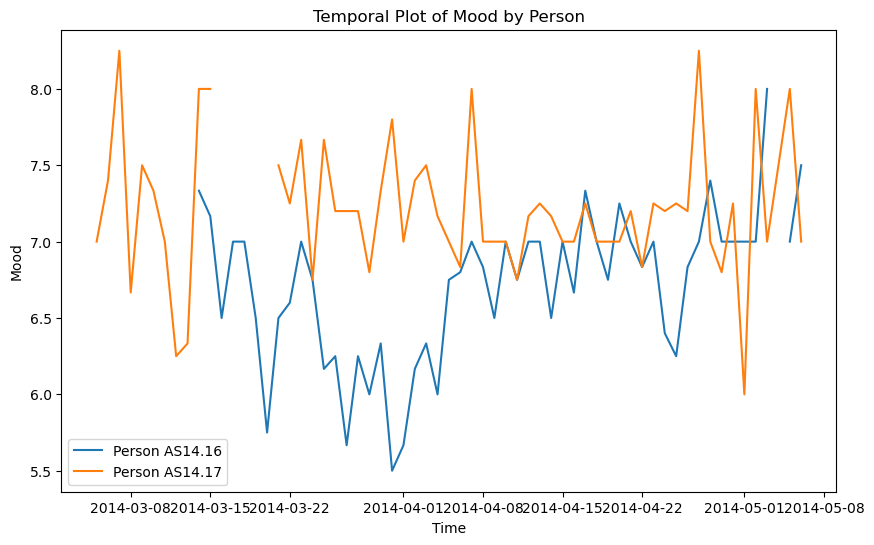

In [23]:
# Reset index to convert multi-index to columns
df_pivot.reset_index(inplace=True)

# Create a list of unique persons
persons = df_pivot['id'].unique()[4:6]

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each person and plot their mood over time
for person in persons:
    df_person = df_pivot[df_pivot['id'] == person]
    plt.plot(df_person['time_hour'], df_person['mood'], label=f'Person {person}')

plt.xlabel('Time')
plt.ylabel('Mood')
plt.title('Temporal Plot of Mood by Person')
plt.legend()
plt.show()



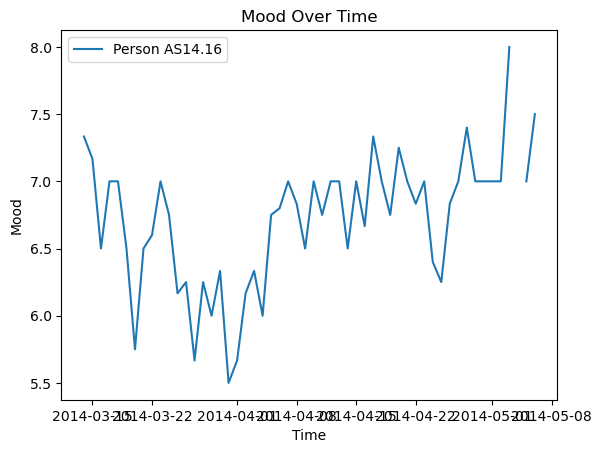

<Figure size 640x480 with 0 Axes>

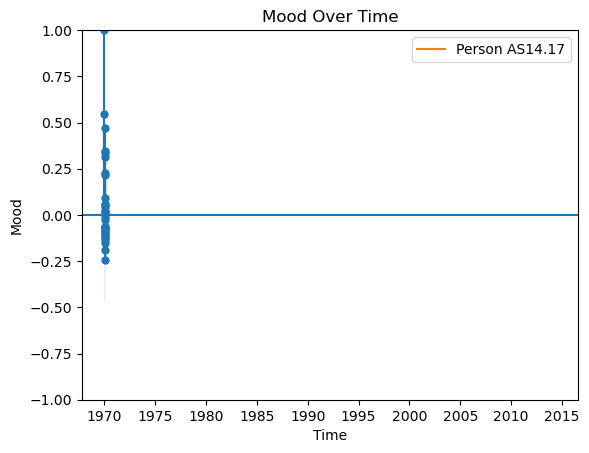

<Figure size 640x480 with 0 Axes>

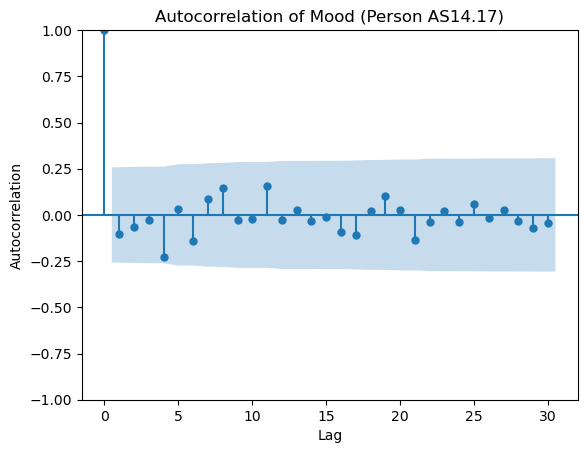

In [24]:
# Loop through each person and plot their mood over time
for person in persons:
    df_person = df_pivot[df_pivot['id'] == person]
    plt.plot(df_person['time_hour'], df_person['mood'], label=f'Person {person}')
    plt.xlabel('Time')
    plt.ylabel('Mood')
    plt.title('Mood Over Time')
    plt.legend()

    # Plot autocorrelation for mood
    plt.figure()
    plot_acf(df_person['mood'].dropna(), lags=30)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of Mood (Person {person})')

plt.show()
